In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import geopy
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
print("All packages imported!")

All packages imported!


In [2]:
df = pd.read_csv("food_coded.csv")

In [3]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [4]:
df = df[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]

In [5]:
df

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,NaN,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3


In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.isnull().sum()

cook             0
eating_out       0
employment       0
ethnic_food      0
exercise         0
fruit_day        0
income           0
on_off_campus    0
pay_meal_out     0
sports           0
veggies_day      0
dtype: int64

In [8]:
df.describe()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.760000,2.520000,2.450000,3.670000,1.60000,4.250000,4.660000,1.360000,3.440000,1.350000,3.980000
std,1.035921,1.105359,0.538891,1.231366,0.68165,0.936089,1.394216,0.718022,1.076095,0.479372,1.109919
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.00000,4.000000,4.000000,1.000000,3.000000,1.000000,3.000000
50%,3.000000,2.000000,2.000000,4.000000,1.00000,5.000000,5.000000,1.000000,3.000000,1.000000,4.000000
75%,3.000000,3.000000,3.000000,5.000000,2.00000,5.000000,6.000000,1.000000,4.000000,2.000000,5.000000
max,5.000000,5.000000,3.000000,5.000000,3.00000,5.000000,6.000000,4.000000,6.000000,2.000000,5.000000


In [9]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df)
df['Cluster']=kmeans.labels_

C:\Users\lavin\AppData\Local\Temp\ipykernel_7180\2792360216.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.boxplot(data = df[df['Cluster'] == k].drop('Cluster',1), ax=axes[k])
C:\Users\lavin\AppData\Local\Temp\ipykernel_7180\2792360216.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.boxplot(data = df[df['Cluster'] == k].drop('Cluster',1), ax=axes[k])
C:\Users\lavin\AppData\Local\Temp\ipykernel_7180\2792360216.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.boxplot(data = df[df['Cluster'] == k].drop('Cluster',1), ax=axes[k])


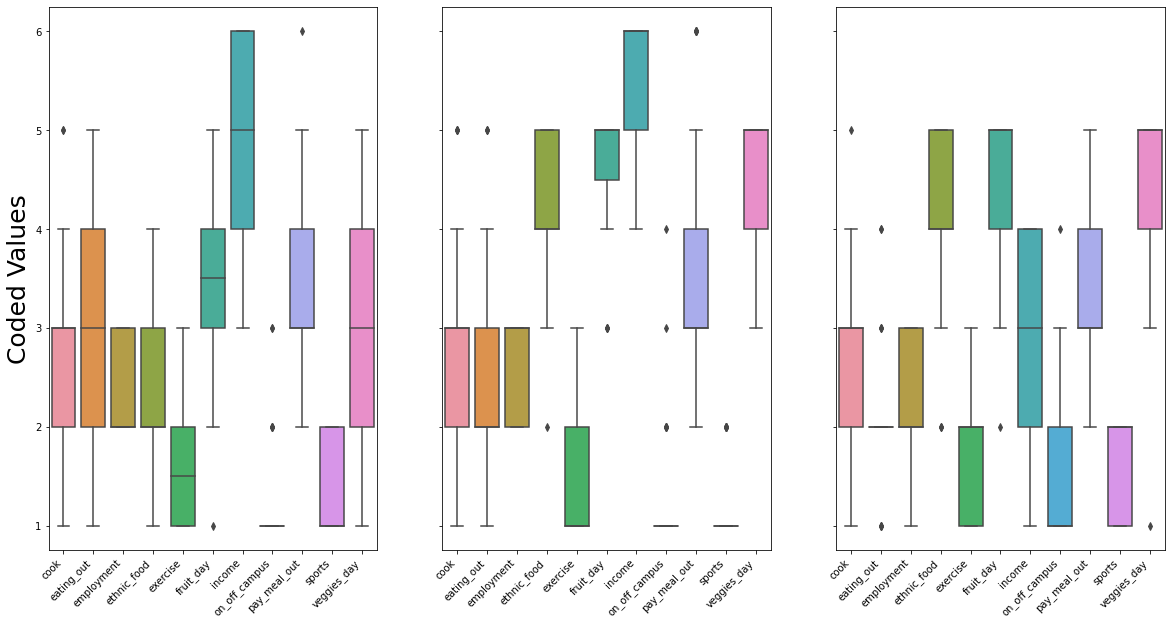

In [10]:
fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=25)

for k in range(kclusters):
     plt.sca(axes[k])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(data = df[df['Cluster'] == k].drop('Cluster',1), ax=axes[k])
        
plt.show()

Possible insights:

Kmeans: 2 clusters: No clear demarcation is seen; we can't discriminate on 2 categories alone.

3 clusters: Now we see three clear groups: One high income group which insists on eating healthy, the other is more relaxed in diet.

The low income group has its own profile, as discussed in insights.

For higher numbers of clusters, it becomes difficult to draw any concrete conclusions.

High income students in general are:

1.>Much more likely to stay on campus.

2.>Less likely to cook.

3.>Eat out more often.

In addition, a subset of higher income students: 1.>Eat out less often.

2.>Have a healthier, more varied diet in general. (Eat ethnic food, fruits, vegetables etc.)

Lower income students are more likely to:

1.>Eat more vegetables

2.>Eat more fruits.

3.>More likely to cook, so more likely to stay off campus.

4.>Obviously, pay less for meals out.

Essentially, we need to think about accomodation for 2 types of students, low income and high income(varied diet).

The high income(fixed diet) students will ideally stay on campus, so they don't have to be taken into account.

In [11]:

import json, requests
CLIENT_ID = 'XIIM5W1A0NKAFDSEAUJ34FHU0GHVJ5FUESJPXXPZ1PJEGKB0' # your Foursquare ID
CLIENT_SECRET = '0D52FZGNWAS5FLJ1Y5QOFYPAGM12CWG13NS4O2OEVSPT4YIE' # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    12.9716, 77.5946,
    30000, 
    LIMIT)
data = requests.get(url).json()

In [12]:
dataframe = pd.json_normalize(data['response']['groups'][0]['items'])

In [13]:
dataframe.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.crossStreet,venue.location.neighborhood
0,e-0-51d1245e498ef93fd0e713bb-0,0,"[{'summary': 'This spot is popular', 'type': '...",51d1245e498ef93fd0e713bb,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,"[{'label': 'display', 'lat': 12.97236177249022...",97,...,Bangalore,Karnātaka,India,"[24/1 Vittal Mallya Road, Bangalore 560001, Ka...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],131922146,NaN,NaN
1,e-0-4bbc4513e45295217db855a4-1,0,"[{'summary': 'This spot is popular', 'type': '...",4bbc4513e45295217db855a4,Cubbon Park,M G Road,12.977042,77.595277,"[{'label': 'display', 'lat': 12.97704217520378...",610,...,Bangalore,Karnātaka,India,"[M G Road, Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN,NaN
2,e-0-4b5aaef9f964a520b8d028e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b5aaef9f964a520b8d028e3,Hard Rock Cafe Bengaluru,40 St. Marks Road,12.976179,77.601543,"[{'label': 'display', 'lat': 12.9761788, 'lng'...",909,...,Bangalore,Karnātaka,India,"[40 St. Marks Road (St. Marks Rd), Bangalore 5...","[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",0,[],NaN,St. Marks Rd,NaN
3,e-0-4bfd513fe9309521040962ab-3,0,"[{'summary': 'This spot is popular', 'type': '...",4bfd513fe9309521040962ab,Corner House,at Lavelle Rd.,12.972979,77.599971,"[{'label': 'display', 'lat': 12.97297902138346...",602,...,Bangalore,Karnātaka,India,"[at Lavelle Rd. (Madras Bank Rd.), Bangalore, ...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,Madras Bank Rd.,NaN
4,e-0-4b97ad0bf964a5200c0f35e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b97ad0bf964a5200c0f35e3,Harima,"4th Floor, Devatha Plaza",12.967755,77.600073,"[{'label': 'display', 'lat': 12.96775461527832...",731,...,Bangalore,Karnātaka,India,"[4th Floor, Devatha Plaza (Residency Road), Ba...","[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",0,[],NaN,Residency Road,NaN


In [14]:
%%time
resta=[]
oth=[]
for lat,lng in zip(dataframe['venue.location.lat'],dataframe['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,lng,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    dataframe = pd.json_normalize(venue)
    df=dataframe['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)
dataframe

CPU times: total: 1.52 s
Wall time: 1min 14s


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,...,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.venuePage.id,venue.location.neighborhood
0,e-0-5662f272498eac2dc526e83a-0,0,"[{'summary': 'This spot is popular', 'type': '...",5662f272498eac2dc526e83a,Whitefield Social,12.997343,77.696288,"[{'label': 'display', 'lat': 12.99734264495814...",55,IN,...,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],NaN,NaN,NaN,NaN,NaN
1,e-0-53f1cc33498e0e419065fefb-1,0,"[{'summary': 'This spot is popular', 'type': '...",53f1cc33498e0e419065fefb,BelgYum,12.997362,77.696744,"[{'label': 'display', 'lat': 12.99736198651357...",102,IN,...,India,"[Phoenix Market City, India]","[{'id': '52e81612bcbc57f1066b79f2', 'name': 'C...",0,[],Phoenix Market City,NaN,NaN,NaN,NaN
2,e-0-4ea2b2e7722ec75ade643f30-2,0,"[{'summary': 'This spot is popular', 'type': '...",4ea2b2e7722ec75ade643f30,Phoenix Marketcity,12.997418,77.696559,"[{'label': 'display', 'lat': 12.9974177, 'lng'...",81,IN,...,India,"[Whitefield Main Rd (Mahadevapura), Krishnaraj...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],Whitefield Main Rd,Mahadevapura,560048,582652638,NaN
3,e-0-56224801498ee4a64eaffcaa-3,0,"[{'summary': 'This spot is popular', 'type': '...",56224801498ee4a64eaffcaa,VR Bengaluru,12.996095,77.695393,"[{'label': 'display', 'lat': 12.99609462496371...",166,IN,...,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],NaN,NaN,NaN,NaN,NaN
4,e-0-568653a2498e14934d6314a7-4,0,"[{'summary': 'This spot is popular', 'type': '...",568653a2498e14934d6314a7,PVR IMAX VR Bangalore,12.996194,77.695363,"[{'label': 'display', 'lat': 12.99619430368990...",156,IN,...,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d17f941735', 'name': 'M...",0,[],NaN,NaN,NaN,NaN,NaN
5,e-0-51c1ddc4498e80f222edbfcb-5,0,"[{'summary': 'This spot is popular', 'type': '...",51c1ddc4498e80f222edbfcb,PVR Market City,12.997531,77.695813,"[{'label': 'display', 'lat': 12.99753093023634...",0,IN,...,India,[The Phoenix Market City Mall (Whitefield Main...,"[{'id': '4bf58dd8d48988d180941735', 'name': 'M...",0,[],The Phoenix Market City Mall,"Whitefield Main Rd, Mahadevapura Post",560048,NaN,NaN
6,e-0-57247410498e4345510ce8b7-6,0,"[{'summary': 'This spot is popular', 'type': '...",57247410498e4345510ce8b7,Toscano,12.995942,77.695795,"[{'label': 'display', 'lat': 12.99594191336187...",176,IN,...,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],NaN,NaN,NaN,NaN,NaN
7,e-0-5094dbc2e4b087ea434ca2ba-7,0,"[{'summary': 'This spot is popular', 'type': '...",5094dbc2e4b087ea434ca2ba,Hamleys,12.997499,77.696655,"[{'label': 'display', 'lat': 12.99749916089661...",91,IN,...,India,"[Phoenix Market City (Whitefield Rd), Bangalor...","[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",0,[],Phoenix Market City,Whitefield Rd,560048,NaN,NaN
8,e-0-50ed2576e4b058814da08c1e-8,0,"[{'summary': 'This spot is popular', 'type': '...",50ed2576e4b058814da08c1e,Cafe Noir,12.997059,77.695990,"[{'label': 'display', 'lat': 12.99705925347858...",55,IN,...,India,"[Phoenix Market City (Whitefield), Bangalore, ...","[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",0,[],Phoenix Market City,Whitefield,NaN,NaN,NaN
9,e-0-571f8765498eaa60e475579d-9,0,"[{'summary': 'This spot is popular', 'type': '...",571f8765498eaa60e475579d,The Whitefield Arms Café,12.996539,77.695929,"[{'label': 'display', 'lat': 12.99653898466793...",111,IN,...,India,"[Ground Floor, VR Bengaluru (Mahadevpura), Ban...","[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],"Ground Floor, VR Bengaluru",Mahadevpura,NaN,NaN,NaN


In [15]:
dataframe['restaurant'] = pd.Series(resta)
dataframe['others']=pd.Series(oth)

In [16]:
dataframe=dataframe[['venue.location.lat','venue.location.lng','restaurant','others','venue.location.address']]

In [17]:
dataframe = dataframe.dropna()

In [18]:
dataframe

,venue.location.lat,venue.location.lng,restaurant,others,venue.location.address
1,12.997362,77.696744,42,28,Phoenix Market City
2,12.997418,77.696559,62,38,Whitefield Main Rd
5,12.997531,77.695813,31,19,The Phoenix Market City Mall
7,12.997499,77.696655,67,33,Phoenix Market City
8,12.997059,77.695990,58,42,Phoenix Market City
9,12.996539,77.695929,66,34,"Ground Floor, VR Bengaluru"
10,12.996190,77.696286,60,37,"UG 04 & 07, Phoenix Market City Mall"
11,12.997666,77.696477,62,38,"The Phoenix Market City, Level 2"
13,12.997658,77.696665,61,39,LG
14,12.994772,77.701066,53,42,"Xylem Building, ITPL Main Road, Whitefield"


In [19]:
dataframe = dataframe.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'lng'})

In [20]:
X1 = dataframe.copy()
X1 = X1.drop(['venue.location.address'],axis =1)

C:\Users\lavin\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


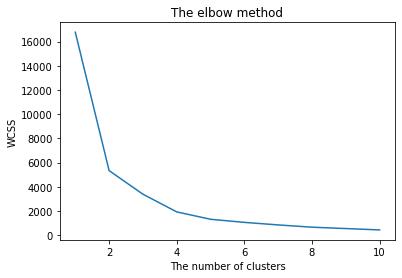

In [21]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init = 'k-means++',random_state=42)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans=KMeans(n_clusters=4, init='k-means++',random_state=42)
X1['cluster']=kmeans.fit_predict(X1)

In [23]:

closest = kmeans.cluster_centers_
X1["centroids"] = 0
for i in range(len(closest)):
    X1["centroids"].iloc[i] = 1

C:\Users\lavin\AppData\Local\Temp\ipykernel_7180\1179748797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1["centroids"].iloc[i] = 1


In [24]:
X1[X1['centroids']==1]

,lat,lng,restaurant,others,cluster,centroids
1,12.997362,77.696744,42,28,3,1
2,12.997418,77.696559,62,38,2,1
5,12.997531,77.695813,31,19,3,1
7,12.997499,77.696655,67,33,2,1


In [25]:
X1['venue.location.formattedAddress'] = dataframe['venue.location.address']
X1.head()

,lat,lng,restaurant,others,cluster,centroids,venue.location.formattedAddress
1,12.997362,77.696744,42,28,3,1,Phoenix Market City
2,12.997418,77.696559,62,38,2,1,Whitefield Main Rd
5,12.997531,77.695813,31,19,3,1,The Phoenix Market City Mall
7,12.997499,77.696655,67,33,2,1,Phoenix Market City
8,12.997059,77.695990,58,42,2,0,Phoenix Market City


In [26]:
import folium
m = folium.Map(location=[12.9716, 77.5946])

In [27]:
city = "Bangalore"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
location = [location.latitude, location.longitude]
print("[lat, lng]:", location)

Bengaluru, Bangalore North, Bangalore Urban, Karnataka, 560001, India
[lat, lng]: [12.9767936, 77.590082]


In [28]:
import sklearn.preprocessing
import folium
x, y = "lat", "lng"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = X1.copy()
## create color column
lst_elements = sorted(list(X1[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(X1[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_